# Explore here

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.to_csv('../data/raw/raw_data,csv', index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.drop('id', axis=1).duplicated().sum()


np.int64(0)

In [6]:
columnas_irrelevantes = ['name','host_name', 'last_review','reviews_per_month','number_of_reviews','id']
df.drop(columnas_irrelevantes,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


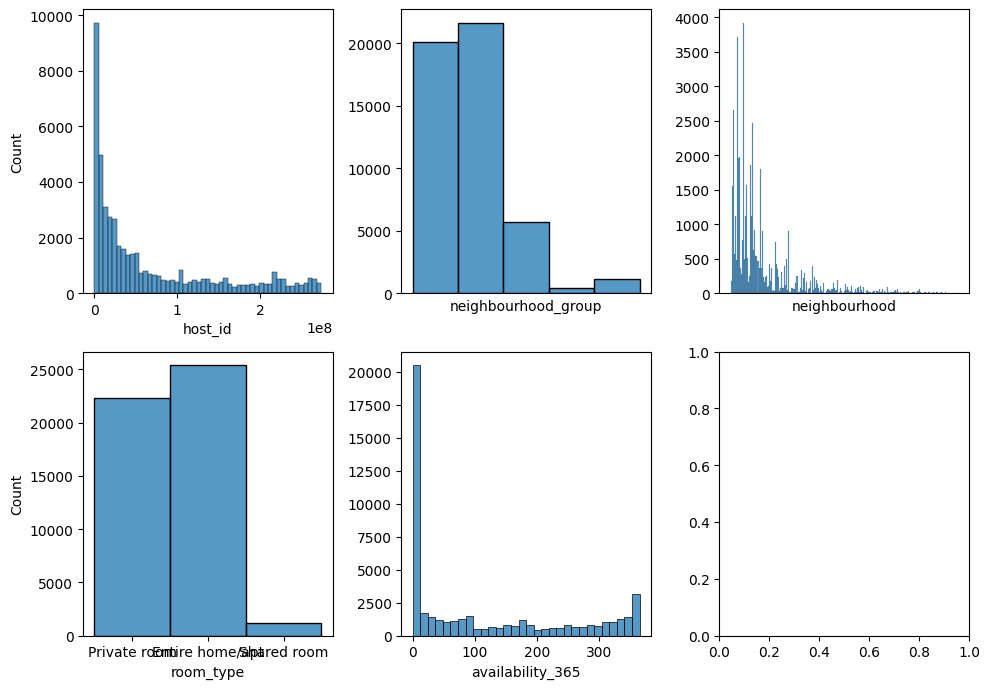

In [7]:
#Análisis de Variables categóricas
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax= axis[0,0],data=df,x='host_id')
sns.histplot(ax= axis[0,1],data=df,x='neighbourhood_group').set(ylabel = None,xticks=[])
sns.histplot(ax= axis[0,2],data=df,x='neighbourhood').set(ylabel = None,xticks=[])
sns.histplot(ax= axis[1,0],data=df,x='room_type')
sns.histplot(ax= axis[1,1],data=df,x='availability_365').set(ylabel = None)

plt.tight_layout()

plt.show()


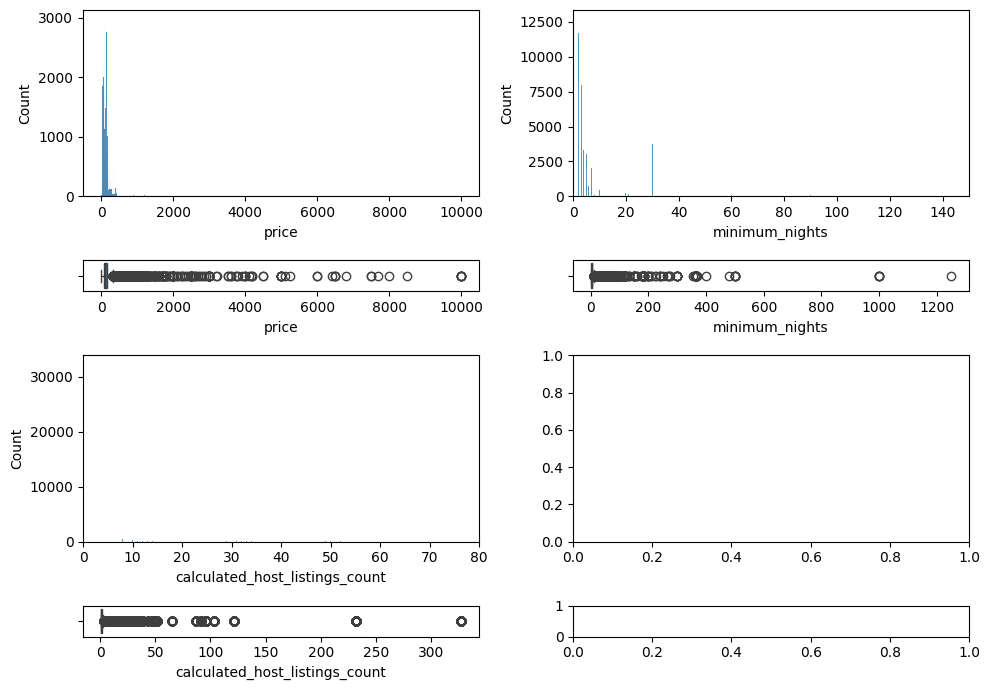

In [8]:
#variables numericas
#price, minimun_nights, calculated_host_listings_count

fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='price')
sns.boxplot(ax=axis[1,0],data=df,x='price')

sns.histplot(ax=axis[0,1],data=df,x='minimum_nights').set_xlim(0,150)
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights')

sns.histplot(ax=axis[2,0],data=df,x='calculated_host_listings_count').set_xlim(0,80)
sns.boxplot(ax=axis[3,0],data=df,x='calculated_host_listings_count')
plt.tight_layout()
plt.show()

<Axes: >

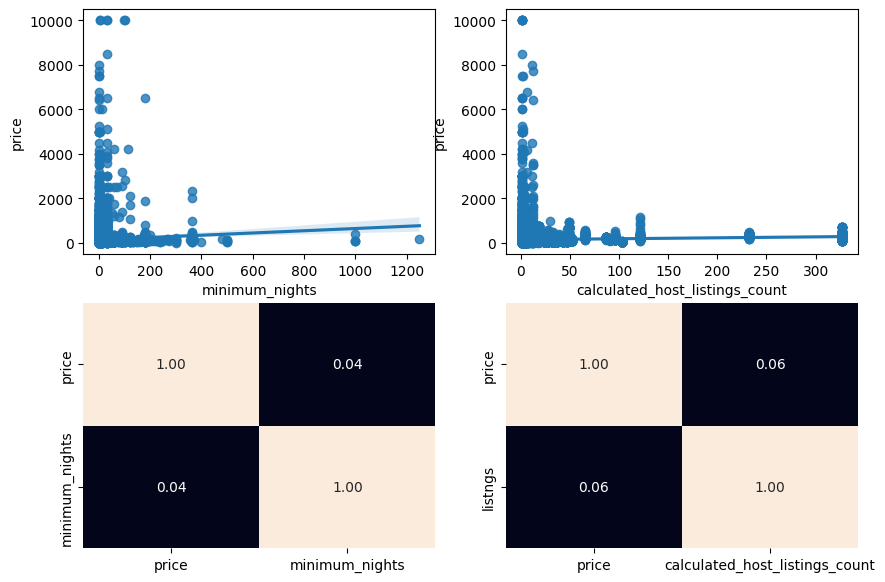

In [9]:
#Analisis multivariante
#numerico-numerico

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0,0], data=df,x='minimum_nights', y='price')
sns.heatmap(df[['price','minimum_nights']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df,x='calculated_host_listings_count', y='price')
sns.heatmap(df[['price','calculated_host_listings_count']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False,yticklabels=['price','listngs'])

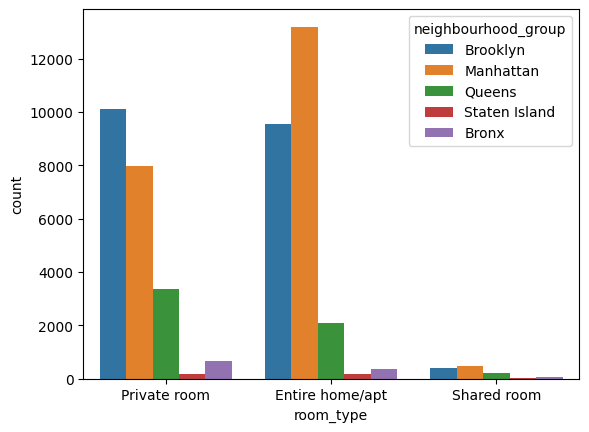

In [10]:
#categorico-categorico

sns.countplot(data=df,x='room_type',hue='neighbourhood_group')

plt.show()

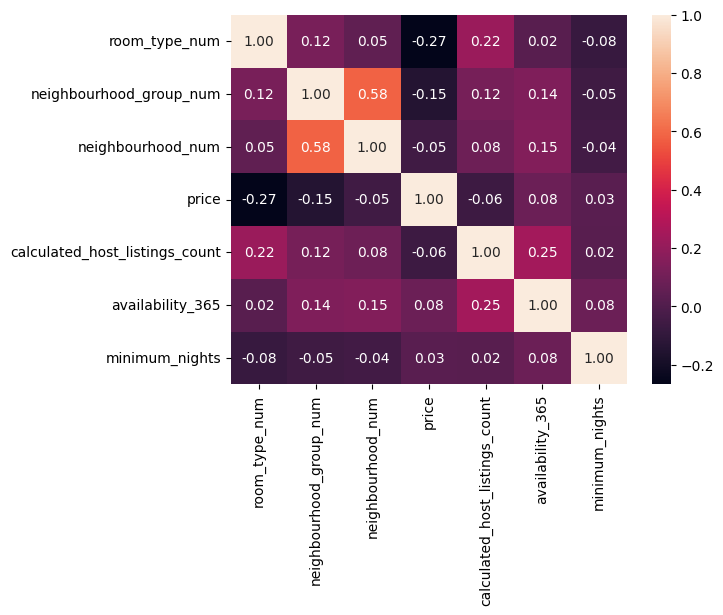

In [56]:
#categorico-numerico
df['room_type_num'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group_num'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood_num'] = pd.factorize(df['neighbourhood'])[0]

columnas_correlacion = ['room_type_num','neighbourhood_group_num','neighbourhood_num','price','calculated_host_listings_count','availability_365','minimum_nights']

sns.heatmap(df[columnas_correlacion].corr(),annot=True,fmt='.2f')
plt.show()

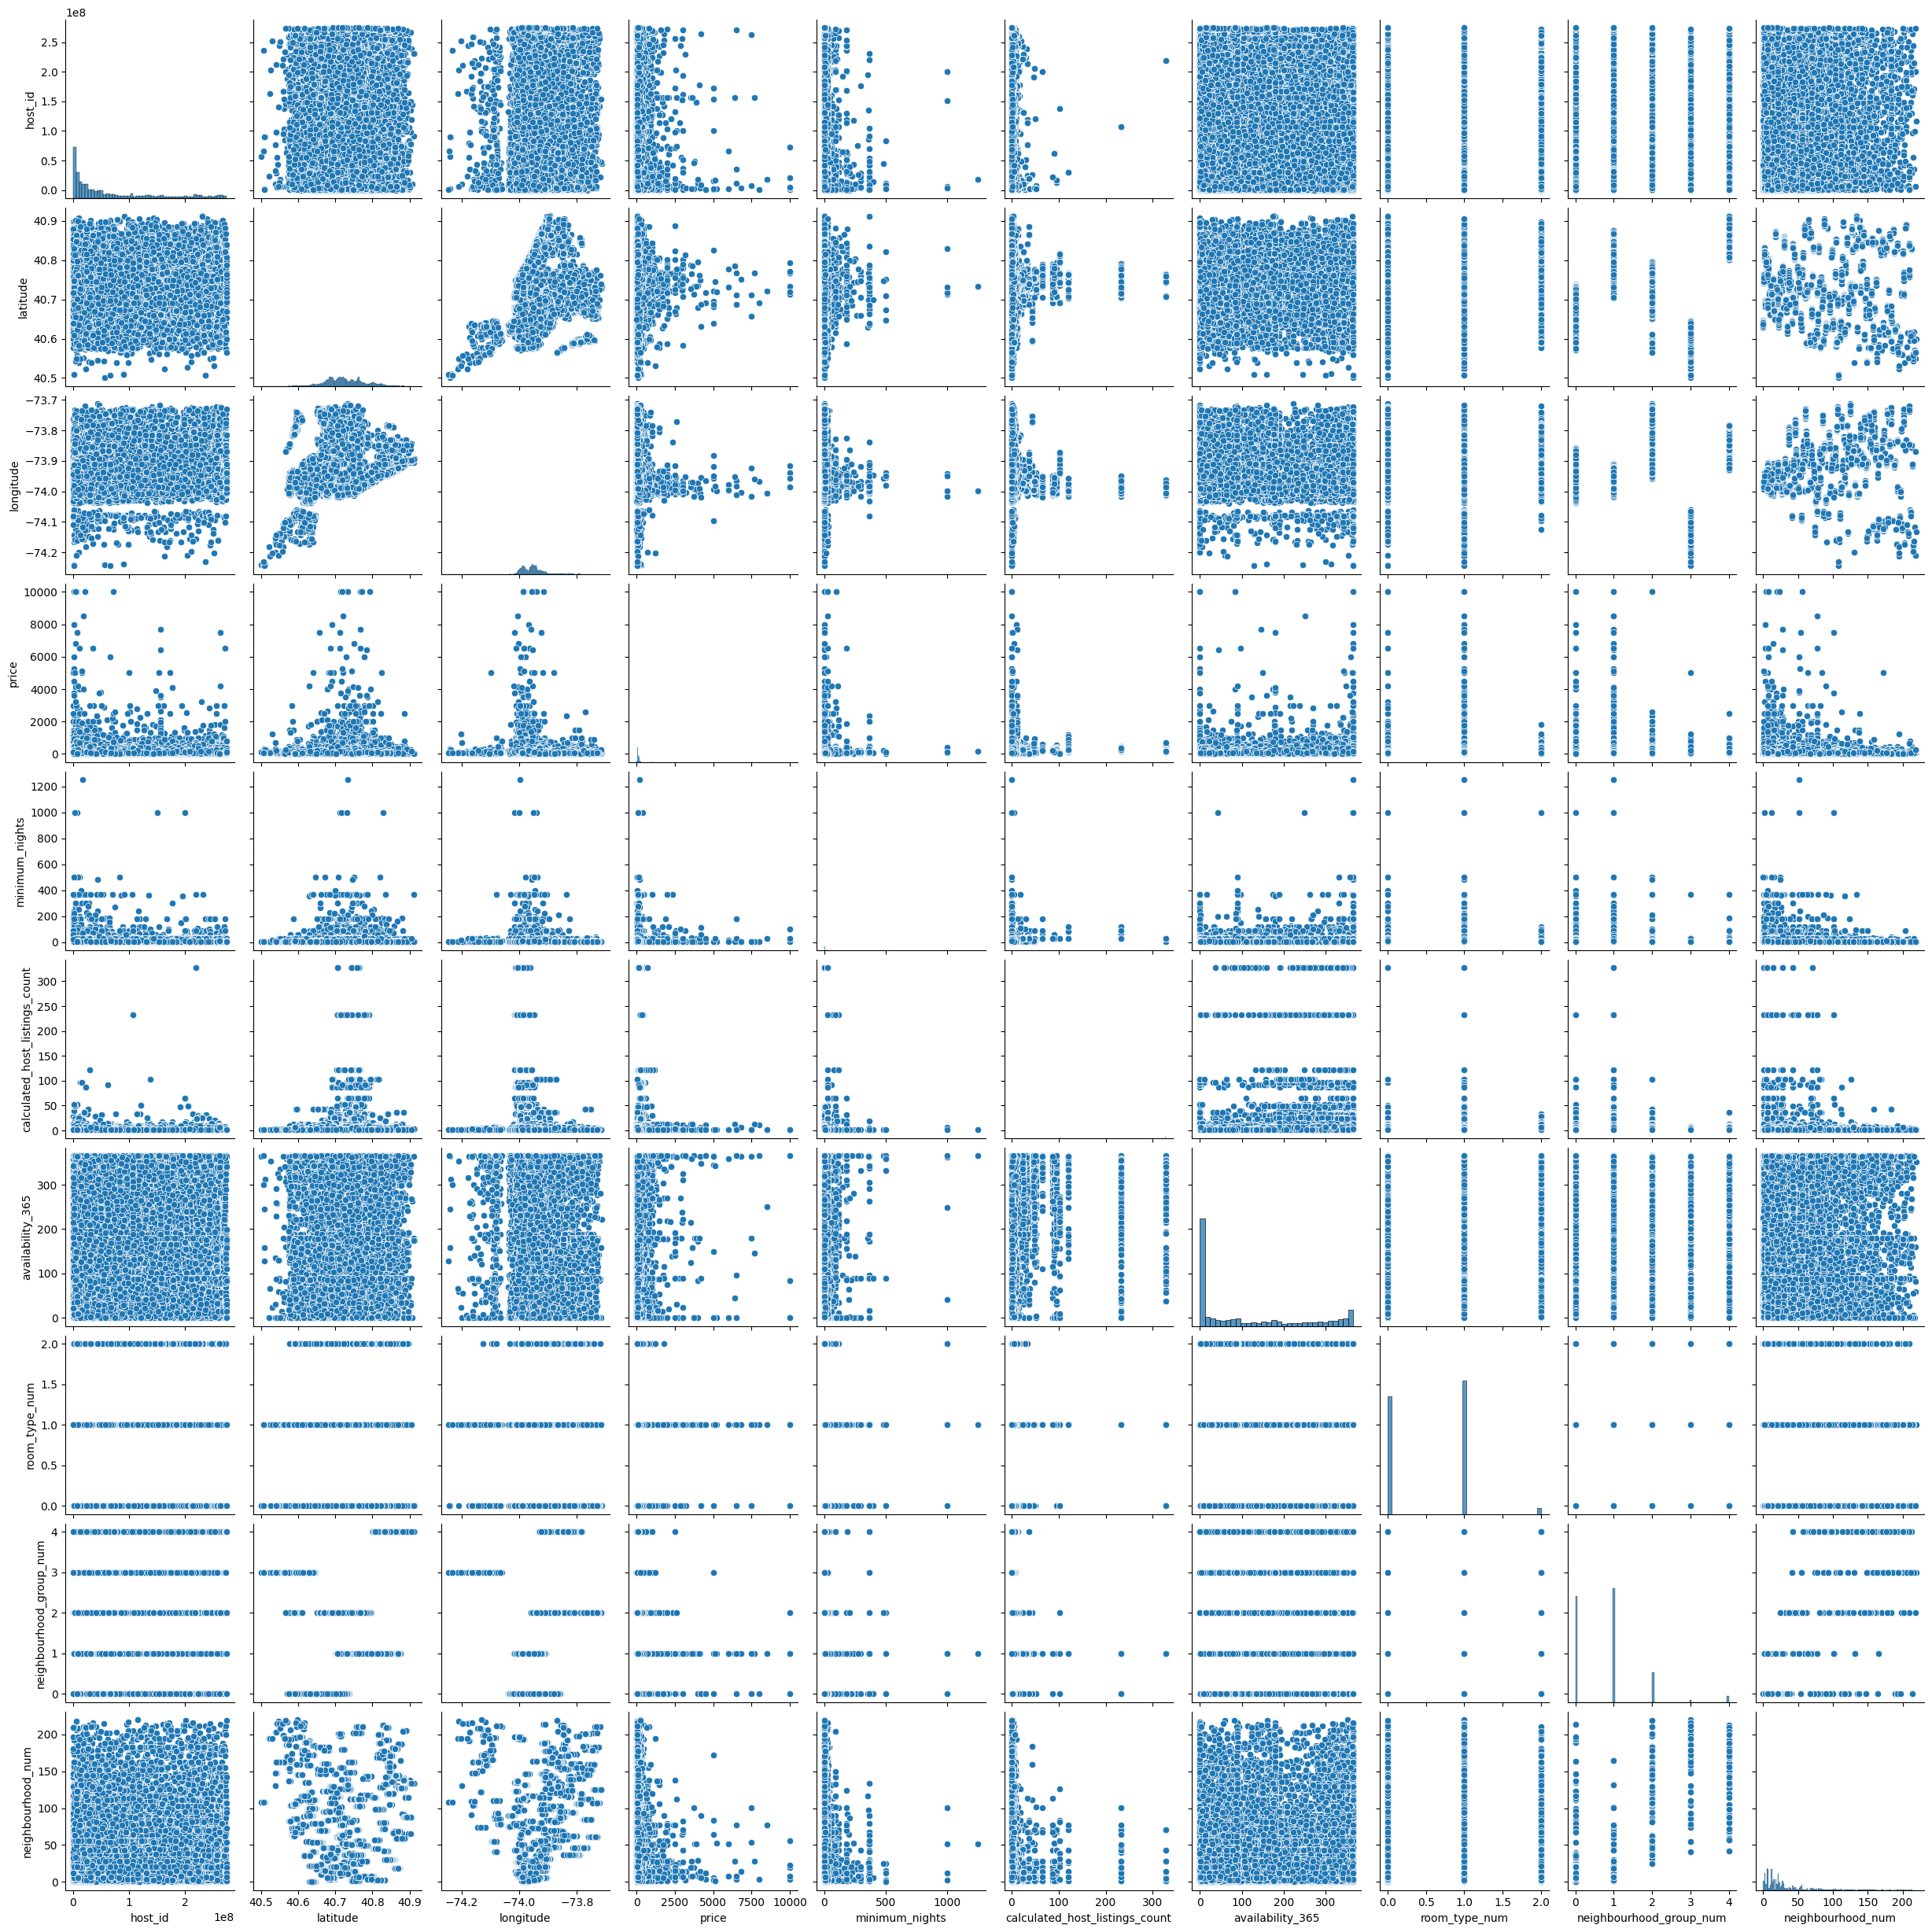

In [12]:
sns.pairplot(data=df)
plt.show()

In [13]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,room_type_num,neighbourhood_group_num,neighbourhood_num
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,7.143982,112.781327,0.567113,0.786911,29.888782
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,32.952519,131.622289,0.541249,0.844386,34.676634
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,327.000000,365.000000,2.000000,4.000000,220.000000


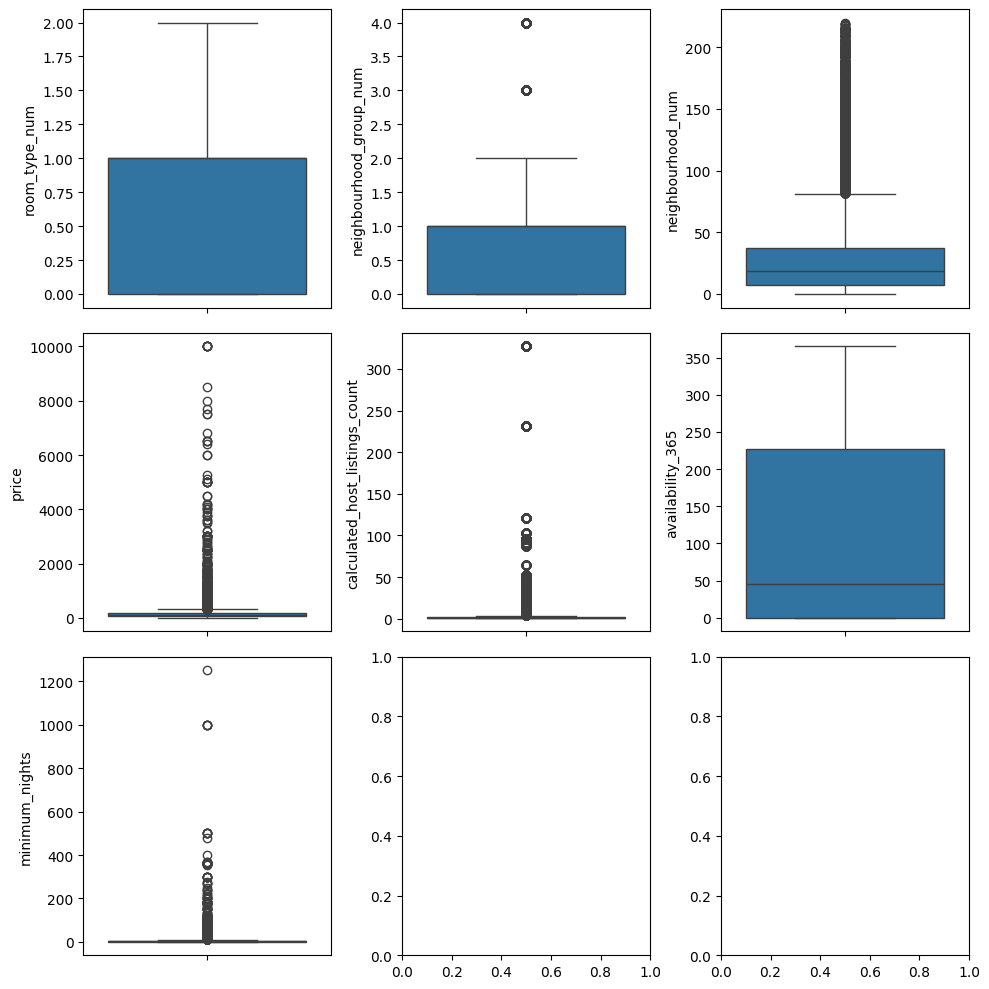

In [14]:
fig, axis = plt.subplots(3, 3, figsize = (10, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = 'room_type_num')
sns.boxplot(ax = axis[0, 1], data = df, y = 'neighbourhood_group_num')
sns.boxplot(ax = axis[0, 2], data = df, y = 'neighbourhood_num')
sns.boxplot(ax = axis[1, 0], data = df, y = 'price')
sns.boxplot(ax = axis[1, 1], data = df, y = 'calculated_host_listings_count')
sns.boxplot(ax = axis[1, 2], data = df, y = 'availability_365')
sns.boxplot(ax = axis[2, 0], data = df, y = 'minimum_nights')


plt.tight_layout()

plt.show()

In [15]:
#outlier de price
stats_price = df['price'].describe()
stats_price
price_iqr = stats_price['75%']-stats_price['25%']
limite_superior = stats_price['75%'] + 1.5 * price_iqr
limite_inferior = stats_price['25%'] - 1.5 * price_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')


El limite superior e inferior para encontrar outliers es 334.0 y -90.0


In [ ]:
print(df.shape)
df = df[df['price']>0]
df.info()

In [27]:
#outlier minimun nights
stats_minimumnights = df['minimum_nights'].describe()
stats_minimumnights
minimumnights_iqr = stats_minimumnights['75%']-stats_minimumnights['25%']
limite_superior = stats_minimumnights['75%'] + 1.5 * minimumnights_iqr
limite_inferior = stats_minimumnights['25%'] - 1.5 * minimumnights_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')


El limite superior e inferior para encontrar outliers es 11.0 y -5.0


In [30]:
print(df.shape)
df = df[df['minimum_nights']<=30]
df.info()

(48884, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 48137 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48137 non-null  int64  
 1   neighbourhood_group             48137 non-null  object 
 2   neighbourhood                   48137 non-null  object 
 3   latitude                        48137 non-null  float64
 4   longitude                       48137 non-null  float64
 5   room_type                       48137 non-null  object 
 6   price                           48137 non-null  int64  
 7   minimum_nights                  48137 non-null  int64  
 8   calculated_host_listings_count  48137 non-null  int64  
 9   availability_365                48137 non-null  int64  
 10  room_type_num                   48137 non-null  int64  
 11  neighbourhood_group_num         48137 non-null  int64  
 12  neighbourhood_num        

In [31]:
#outlier calculated_host_listings_count
stats_ed_host_listings_count = df['calculated_host_listings_count'].describe()
stats_ed_host_listings_count
calculated_host_listings_count_iqr = stats_minimumnights['75%']-stats_minimumnights['25%']
limite_superior = stats_ed_host_listings_count['75%'] + 1.5 * calculated_host_listings_count_iqr
limite_inferior = stats_ed_host_listings_count['25%'] - 1.5 * calculated_host_listings_count_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')


El limite superior e inferior para encontrar outliers es 8.0 y -5.0


In [32]:
print(df.shape)
df = df[df['calculated_host_listings_count']<=4]
df.info()

(48137, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 42624 entries, 1 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         42624 non-null  int64  
 1   neighbourhood_group             42624 non-null  object 
 2   neighbourhood                   42624 non-null  object 
 3   latitude                        42624 non-null  float64
 4   longitude                       42624 non-null  float64
 5   room_type                       42624 non-null  object 
 6   price                           42624 non-null  int64  
 7   minimum_nights                  42624 non-null  int64  
 8   calculated_host_listings_count  42624 non-null  int64  
 9   availability_365                42624 non-null  int64  
 10  room_type_num                   42624 non-null  int64  
 11  neighbourhood_group_num         42624 non-null  int64  
 12  neighbourhood_num        

In [17]:
#NULL

df.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
availability_365                  0
room_type_num                     0
neighbourhood_group_num           0
neighbourhood_num                 0
dtype: int64

In [58]:
from sklearn.preprocessing import MinMaxScaler

variables_numericas = ['minimum_nights', 'calculated_host_listings_count','availability_365','neighbourhood_group_num','room_type_num']

from sklearn.model_selection import train_test_split

X = df[variables_numericas]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = MinMaxScaler()

caracteristicas_escaladas = scaler.fit_transform(X_train)
caracteristicas_test_escaladas = scaler.transform(X_test)
X_train_esc = pd.DataFrame(caracteristicas_escaladas, index = X_train.index, columns=X_train.columns)
y_train_esc = y_train

X_test_esc = pd.DataFrame(caracteristicas_test_escaladas,index=X_test.index,columns=X_test.columns)
y_test_esc = y_test
X_train_esc.describe()


,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_num,room_type_num
count,34099.000000,34099.000000,34099.000000,34099.000000,34099.000000
mean,0.115386,0.130062,0.257562,0.193591,0.248160
std,0.212200,0.252409,0.335147,0.213258,0.267316
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.034483,0.000000,0.060274,0.250000,0.000000
75%,0.103448,0.333333,0.482192,0.250000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#Seleccion de Características

from sklearn.feature_selection import f_classif,SelectKBest

selection_model = SelectKBest(f_classif,k=4)
selection_model.fit(X_train_esc,y_train_esc)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_esc),columns = X_train_esc.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_esc),columns = X_test_esc.columns.values[ix])

X_train_sel.head()

,calculated_host_listings_count,availability_365,neighbourhood_group_num,room_type_num
0,0.0,0.290411,0.25,0.5
1,0.0,0.232877,0.25,0.0
2,0.0,0.000000,0.00,0.5
3,0.0,0.000000,0.25,0.0
4,0.0,0.679452,0.00,0.0


In [60]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [61]:
X_train_sel.to_csv("../data/processed/clean_datatrain,csv'", index=False)
X_test_sel.to_csv("../data/processed/clean_datatest,csv'", index=False)